In [1]:
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab

/Users/tomoyasasaki/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%matplotlib inline

In [3]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

K = 3 # number of coefficients, including the constant

In [4]:
X = np.array(([ [1,  float(np.random.normal(0,1)),float(np.random.normal(0,0.5))] for i in range(2000)  ]))
print(X.shape)

(2000, 3)


In [5]:
beta = np.array([0.5, 1.5, 2.5])
print(beta.shape)
print(beta)

(3,)
[ 0.5  1.5  2.5]


In [6]:
Xbeta = np.dot(X, beta) # + np.random.logistic(scale=0.15, size=X.shape[0]) # do not forget to add an error term
pi = sigmoid(Xbeta)
print(pi.shape)
print(pi[:15])

(2000,)
[ 0.80236531  0.18963134  0.91646555  0.91293516  0.13041347  0.0312284
  0.60271109  0.12486234  0.86812753  0.86862158  0.4500867   0.78219894
  0.99310601  0.17029035  0.15175688]


In [7]:
Y = np.array([np.random.binomial(1, p=prob) for prob in pi])
print(Y.shape)
print(Y[:5])

(2000,)
[1 0 1 1 0]


# Unbounded Slice Sampling

変換:
    $$
    p = \frac{1}{1 + \exp(-Ax)}, \quad 0 < p < 1 \\
    $$

戻す:
   $$
    x = -\frac{1}{A} \log \left(\frac{1}{p} - 1\right),　\quad -\infty < x < \infty\\
    $$
   
ヤコビアン:<br>
    $dx/dp$より、
    $$
    dx = \frac{1}{A} \frac{1}{p(1-p)}dp\\
    $$

Likelihood:
    $$
    \mathcal{L} = \prod_i p_i^{y_i} (1-p_i)^{1-y_i} 
    $$    
    or 
    $$
    \mathcal{L} = \prod_i \left( \frac{1}{1 + \exp(- \beta X_i)} \right)^{y_i} %
    \left( \frac{\exp(- \beta X_i)}{1 + \exp(- \beta X_i)}\right)^{1 - y_i}  
    $$
    where
    $$
    p = \frac{1}{1 + \exp(- \beta X_i)} \\
    $$
 
 Loglikelihood:
     $$
     \log\mathcal{L}= \sum_i \left\{ y_i \log \left( \frac{1}{1 + \exp(- \beta X_i)} \right)  % 
     + (1 - y_i) \log \left( \frac{\exp(- \beta X_i)}{1 + \exp(- \beta X_i)} \right) \right\}\\
     $$
     
Prior:
    $$
    \beta_j \sim \mathcal{N} (\mu_j, \sigma_j^2)\\
    $$

Posterior:
    $$
    \mathcal{P} = \prod_i \left( \frac{1}{1 + \exp(- \beta X_i)} \right)^{y_i} %
    \left( \frac{\exp(- \beta X_i)}{1 + \exp(- \beta X_i)}\right)^{1 - y_i}  %
    \prod_j \frac{1}{\sqrt{2 \pi \sigma_j^2}} \exp  \left\{ - \frac{(\beta_j - \mu_j)^2}{2 \sigma_j^2} \right\} \\
    $$
 
 Log-posterior
    $$
     \log\mathcal{P}= \sum_i \left\{ y_i \log \left( \frac{1}{1 + \exp(- \beta X_i)} \right)  % 
     + (1 - y_i) \log \left( \frac{\exp(- \beta X_i)}{1 + \exp(- \beta X_i)} \right) \right\} %
     + \sum_j \left[ \log \left( \frac{1}{\sqrt{2 \pi \sigma_j^2}} \right) + \left\{ - \frac{(\beta_j - \mu_j)^2}{2 \sigma_j^2} \right\} \right] \\
     \propto \sum_i \left\{ y_i \log \left( \frac{1}{1 + \exp(- \beta X_i)} \right)  % 
     + (1 - y_i) \log \left( \frac{\exp(- \beta X_i)}{1 + \exp(- \beta X_i)} \right) \right\} %
      - \sum_j \left\{　\frac{(\beta_j - \mu_j)^2}{\sigma_j^2}　\right\}
    $$

## Reference
1. [here][1]
2. [here][2]

[1]:https://stats.stackexchange.com/questions/163034/bayesian-logit-model-intuitive-explanation
[2]:http://www.medicine.mcgill.ca/epidemiology/joseph/courses/EPIB-621/bayeslogit.pdf

In [34]:
np.power(4,3)

64

In [41]:
def logsigmoid(x):
    return - np.log(1 + np.exp(-x))

# def loglikelihood(beta, X):
#     N = X.shape[0]
#     lik =  (logsigmoid(np.dot(X, beta)) * Y).sum() + (logsigmoid(-np.dot(X, beta)) * (1 - Y)).sum()  + \
#                 ( -0.5 * np.log(2 * np.pi) - 0.5 * np.log(100) - (0.5/100) * np.power(beta, 2)).sum() # prior N(0,10)
    
#     return lik

def loglikelihood(beta, X):
    N = X.shape[0]
    lik =  (logsigmoid(np.dot(X, beta)) * Y).sum() + (logsigmoid(-np.dot(X, beta)) * (1 - Y)).sum()   \
                - ( np.power(beta, 2)) .sum() # prior N(0,10)
    return lik

def expand(p, A=1):
    # p --> x
    return -(1/A)  * np.log((1/p) - 1)
    
def shrink(x, A=1):
    # x --> p
    return 1 / (1 + np.exp(-A * x) )

In [9]:
# function to narrow the range of sampling
def narrow (old_p, new_p, start, end):
    if old_p < new_p:
        end = new_p
    elif new_p < old_p:
        start = new_p

In [10]:
num_iter = 1000
max_narrow = 1000

A = 1
chain = np.zeros((num_iter, K))

In [42]:
num_sampling = 1500
max_shrink_time = 1000
A = 1 # 0.5くらいでも良いかも
chain = np.zeros((num_sampling, K))

for i in range(1, num_sampling):
    param_proposal = chain[i-1].copy()
    param_new = np.zeros(K)
    
    for k in range(K):
        start = 0
        end = 1

        previous_p = shrink( param_proposal[k], A )
        slice_ = loglikelihood( param_proposal, X) - np.log( A * previous_p * (1 -  previous_p) ) + np.log(np.random.uniform())
            # f(x), -\infity < x < \infty を、 0<p<1の範囲に変換しているので、ヤコビアンを忘れないこと
            # np.log( A * previous_p * (1 -  previous_p) )の箇所がそれ
            
        for shrink_time in range(max_shrink_time):
            new_p = np.random.uniform(start, end)
            param_proposal[k] = expand(new_p, A)
            
            newlikelihood = loglikelihood(param_proposal, X) - np.log( A * new_p * (1 -  new_p) )
            
            if  slice_ < newlikelihood :
                break
            # shrink bound (maybe)
            elif previous_p < new_p:
                end = new_p
            elif new_p < previous_p:
                start = new_p
            else:
                break
                
    chain[i, :] = param_proposal.copy()

In [43]:
show_num = 700

0.442775832423


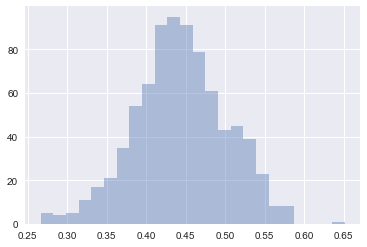

In [44]:
# 0.5
sns.distplot(chain[show_num: , 0], hist=True, kde=False)
# plt.plot([10, 10], [0, 1400], linewidth=2, color='red')
print(np.median(chain[show_num: , 0]))

1.37128052791


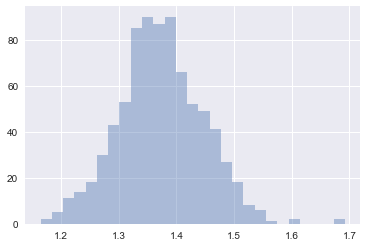

In [45]:
# 1.5
sns.distplot(chain[show_num: , 1], hist=True, kde=False)
#plt.plot([10, 10], [0, 1400], linewidth=2, color='red')
print(np.median(chain[show_num: , 1]))

2.42246474808


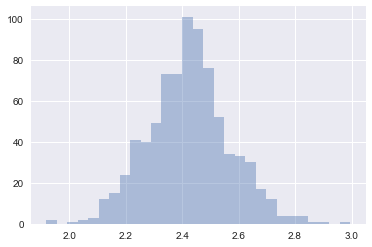

In [46]:
# 2.5
sns.distplot(chain[show_num: , 2], hist=True, kde=False)
#plt.plot([10, 10], [0, 1400], linewidth=2, color='red')
print(np.median(chain[show_num: , 2]))